In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))

from utils.pricing_market_logic_multiproduct import (
    get_monopoly_prices,
    get_nash_prices,
    get_profits,
    get_quantities,
)
from utils.utils import (
    make_df_from_results,
    plot_duopoly_results_from_df,
)

In [2]:
N_FIRMS = 2
MARGINAL_COST = 1.0
ALPHA = 1

a0 = 0.0
a = tuple([2.0 for _ in range(N_FIRMS)])
mu = 0.25
alpha = tuple([ALPHA for _ in range(N_FIRMS)])
c = tuple([MARGINAL_COST for _ in range(N_FIRMS)])
beta = 100
sigma = 0.25  # critical: this disables nesting → standard logit
group_idxs = tuple([i for i in range(1, N_FIRMS + 1)])
WILLIWGNES_TO_PAY = 4.51 * ALPHA

monopoly_prices = get_monopoly_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    c=c,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_q = get_quantities(
    p=tuple(monopoly_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_profits = get_profits(
    p=tuple(monopoly_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

nash_prices = get_nash_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
    c=c,
)
nash_q = get_quantities(
    p=tuple(nash_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
nash_profits = get_profits(
    p=tuple(nash_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

nash_quantities = get_quantities(
    p=tuple(nash_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
print(f"Monopoly prices: {monopoly_prices} | Nash prices: {nash_prices}")
print(f"Monopoly profits: {monopoly_profits} | Monopoly quantities: {monopoly_q}")
print(f"Nash profits: {nash_profits} | Nash quantities: {nash_quantities}")

Monopoly prices: [1.8859367839279824, 1.8859367841816808] | Nash prices: [1.467837558344815, 1.4678375571705864]
Monopoly profits: [31.796841418045727, 31.796841394883895] | Monopoly quantities: [35.89064366090311, 35.89064362448151]
Nash profits: [21.783662839265784, 21.783662886906832] | Nash quantities: [46.56244983052504, 46.56245004922491]


In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import numpy as np
# def plot_duopoly_results_from_df(df, p_nash, p_m, pi_nash, pi_m, title="Figure 2: Duopoly Experiment Results", save_path=None):
#     fig, axs = plt.subplots(1, 2, figsize=(14, 5))
#     fig.suptitle(title, fontsize=16)

#     # === Panel 1: Price comparison ===
#     axs[0].scatter(df.loc[df['prompt']==1,'p1'], df.loc[df['prompt']==1,'p2'], color='tab:blue', marker='s', label='P1 vs. P1')
#     axs[0].scatter(df.loc[df['prompt']==2,'p1'], df.loc[df['prompt']==2,'p2'], color='tab:orange', marker='^', label='P2 vs. P2')

#     # Axis setup
#     axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#     axs[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#     #set x and y ticks each 0.2
#     axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#     axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#     # Reference lines
#     axs[0].axvline(p_nash, color='red', linestyle='--', linewidth=1)
#     axs[0].axhline(p_nash, color='red', linestyle='--', linewidth=1)
#     axs[0].axvline(p_m, color='green', linestyle=':', linewidth=1)
#     axs[0].axhline(p_m, color='green', linestyle=':', linewidth=1)

#     # Axis annotations (external, aligned with ticks)
#     axs[0].annotate(r'$p^{Nash}$', xy=(p_nash, axs[0].get_ylim()[0]),
#                     xytext=(0, -5), textcoords='offset points',
#                     ha='center', va='top', color='red', fontsize=10)
#     axs[0].annotate(r'$p^{Nash}$', xy=(axs[0].get_xlim()[0], p_nash),
#                     xytext=(-5, 0), textcoords='offset points',
#                     ha='right', va='center', color='red', fontsize=10)

#     axs[0].annotate(r'$p^M$', xy=(p_m, axs[0].get_ylim()[0]),
#                     xytext=(0, -5), textcoords='offset points',
#                     ha='center', va='top', color='green', fontsize=10)
#     axs[0].annotate(r'$p^M$', xy=(axs[0].get_xlim()[0], p_m),
#                     xytext=(-5, 0), textcoords='offset points',
#                     ha='right', va='center', color='green', fontsize=10)

#     axs[0].set_xlabel('Firm 1 average price (over periods 251–300)')
#     axs[0].set_ylabel('Firm 2 average price (over periods 251–300)')
#     axs[0].set_title("P1 Compared to P2: Pricing Behavior")
#     axs[0].grid(False)

#     # === Panel 2: Profit comparison ===
#     # === Panel 2: Profit comparison ===
#     df['pi_sum'] = df['pi_1'] + df['pi_2']
#     axs[1].scatter(df.loc[df['prompt']==1,'pi_delta'], df.loc[df['prompt']==1,'pi_sum'], color='tab:blue', marker='s', label='P1 vs. P1')
#     axs[1].scatter(df.loc[df['prompt']==2,'pi_delta'], df.loc[df['prompt']==2,'pi_sum'], color='tab:orange', marker='^', label='P2 vs. P2')

#     # Diagonal lines for π₁ = π^{Nash} and π₂ = π^{Nash}
#     y_vals = np.linspace(2 * pi_nash, 2 * pi_m, 200)
#     delta_1 = 2 * pi_nash - y_vals  # π₁ = π^{Nash}
#     delta_2 = y_vals - 2 * pi_nash  # π₂ = π^{Nash}

#     axs[1].plot(delta_1, y_vals, 'r--', linewidth=1)
#     axs[1].plot(delta_2, y_vals, 'r--', linewidth=1)

#     # Annotations
#     axs[1].text(np.mean(delta_1)*1.5, (2.2*pi_nash), r'$\pi_1 = \pi^{Nash}$', color='red', fontsize=10)
#     axs[1].text(np.mean(delta_2), (2.2*pi_nash), r'$\pi_2 = \pi^{Nash}$', color='red', fontsize=10)

#     # Monopoly profit line
#     axs[1].axhline(2 * pi_m, color='green', linestyle=':', linewidth=1)
#     axs[1].text(min(df['pi_delta'].min(),min(delta_1))*1.05, 2 * pi_m, r'$\pi^M$', color='green', fontsize=10)

#     # Axes setup
#     axs[1].axvline(0, color='black', linestyle='--', linewidth=1)
#     axs[1].set_xlabel('Average difference in profits $\pi_1 - \pi_2$ (over periods 251–300)')
#     axs[1].set_ylabel('Average sum of profits $\pi_1 + \pi_2$ (over periods 251–300)')
#     axs[1].set_title("P1 Compared to P2: Profits Earned")
#     axs[1].grid(False)

#     # === Legend outside below both plots ===
#     handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))
#     if save_path:
#         plt.savefig(save_path, bbox_inches='tight')
#     plt.show()

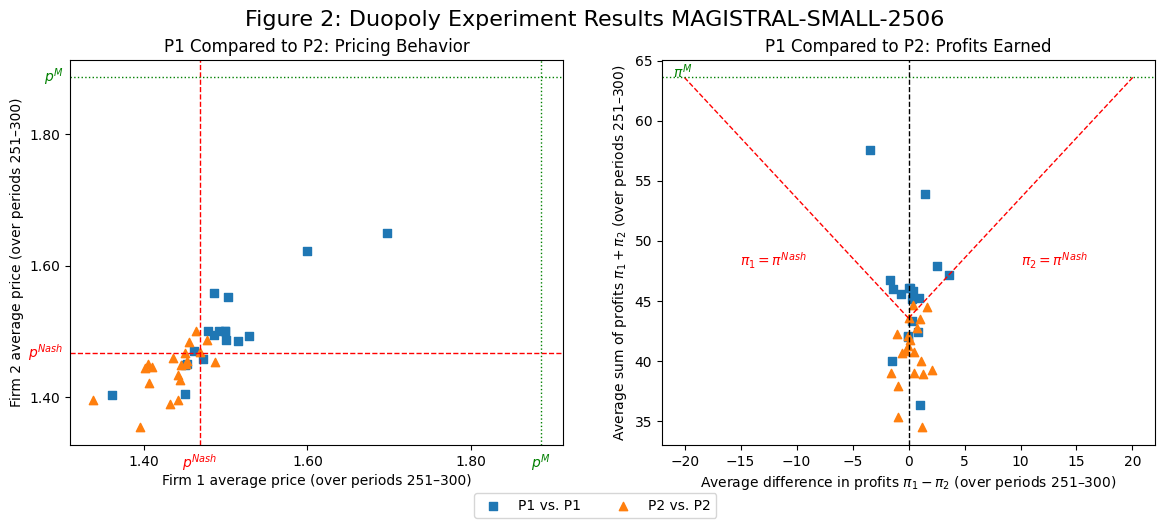

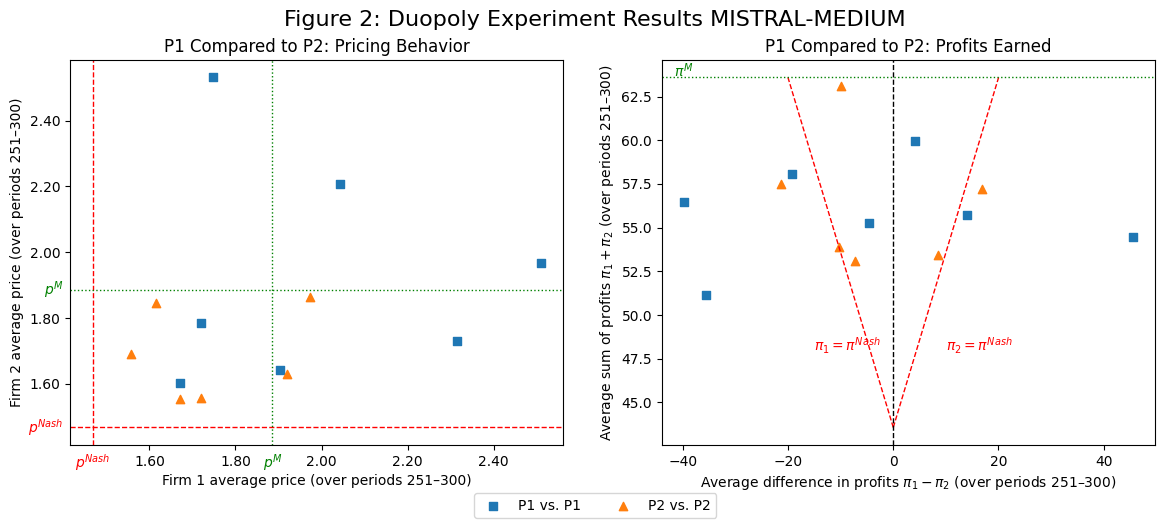

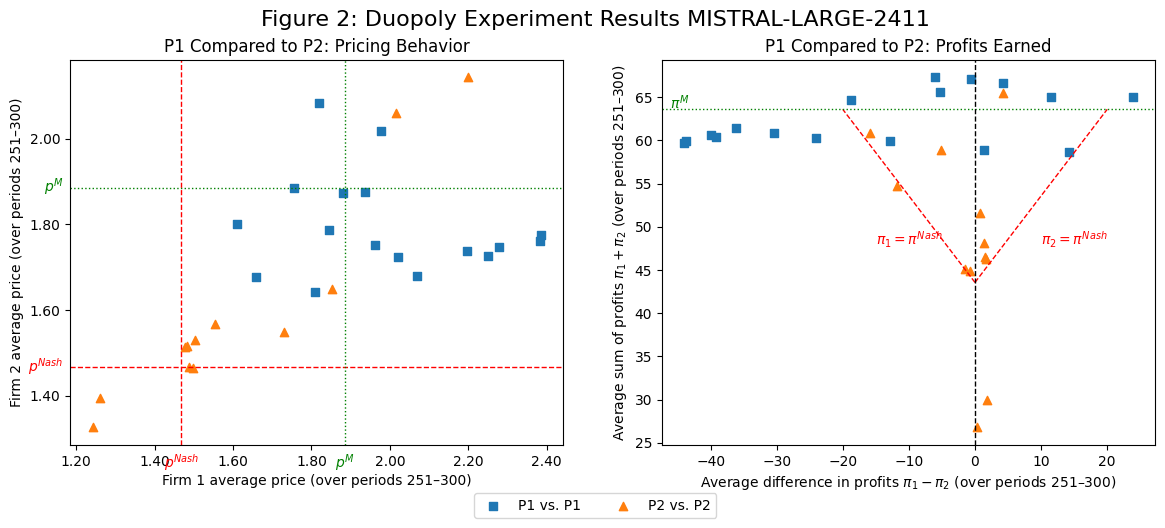

In [4]:
for model in ["magistral-small-2506", "mistral-medium", "mistral-large-2411"]:
    df_res = make_df_from_results(
        results_path="mistral_ai/results/duopoly", model_name=model
    )
    plot_duopoly_results_from_df(
        df_res,
        p_nash=nash_prices[0],
        p_m=monopoly_prices[0],
        pi_nash=nash_profits[0],
        pi_m=monopoly_profits[0],
        title="Figure 2: Duopoly Experiment Results {}".format(model.upper()),
        save_path="./imgs/duopoly_results_{}.png".format(model),
    )

## Animation
---

In [6]:
# create_gif_from_pngs("./mistral_ai/results/oligopoly/prompt_1-alpha_1/2025-06-16_00-08_experiment_magistral-small-2506/experiment_plots",
#                      duration=100)